In [5]:
import importlib
import VQGAN_CLIP
importlib.reload(VQGAN_CLIP)
vqgan_clip = VQGAN_CLIP.VQGAN_CLIP(device="cpu")

#haprams as state vars
#generations params as kwargs

Working with z of shape (1, 256, 16, 16) = 65536 dimensions.
self.latent_dim = (1, 256, 16, 16)


{'prompts': ['a happy woman', 'a smiling woman'], 'weights': tensor([3., 3.])}
[]
Original Image


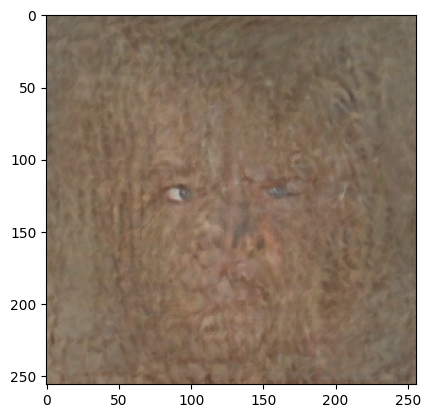

CLIP loss tensor([-4.8856], grad_fn=<AddBackward0>)


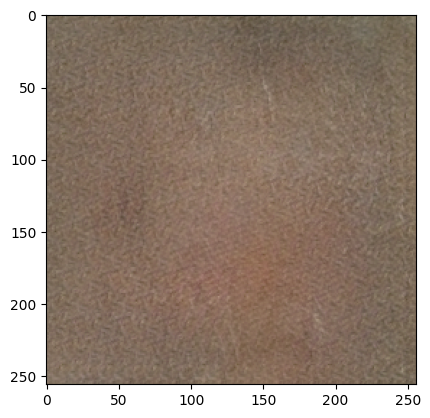

CLIP loss tensor([-4.9200], grad_fn=<AddBackward0>)


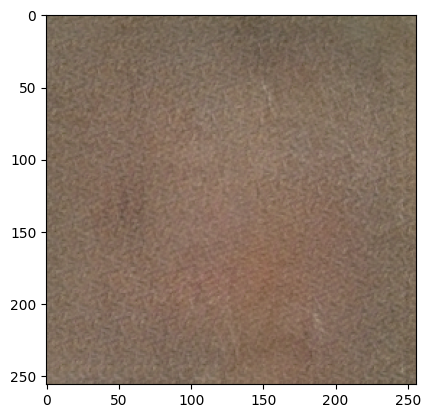

CLIP loss tensor([-4.9206], grad_fn=<AddBackward0>)


KeyboardInterrupt: 

In [6]:

vqgan_clip.generate(
    # pos_prompts=["an angry woman", "a frowning woman"],
    pos_prompts=[("a happy woman", 3), ("a smiling woman", 3)],
    show_intermediate=True,
)

In [ ]:
assert "a"
print("a")

a
